In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage


In [2]:
from google.colab import files
uploaded=files.upload()

Saving wine.csv to wine.csv


In [18]:
df = pd.read_csv("wine.csv")
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


#standardization

In [7]:
df_without_type = df.drop('Type', axis=1)

df_without_type

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [8]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [9]:
scaler.fit(df_without_type)

StandardScaler()

In [11]:
scaled_data=scaler.transform(df_without_type)
scaled_data

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

Applying PCA Algorithm

In [16]:
from sklearn.decomposition import PCA
pca=PCA(n_components=3)
df_pca=pca.fit_transform(scaled_data)
df_pca

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01],
       [ 3.75706561e+00, -2.75637191e+00, -1.76191842e-01],
       [ 1.00890849e+00, -8.69830821e-01,  2.02668822e+00],
       [ 3.05025392e+00, -2.12240111e+00, -6.29395827e-01],
       [ 2.44908967e+00, -1.17485013e+00, -9.77094891e-01],
       [ 2.05943687e+00, -1.60896307e+00,  1.46281883e-01],
       [ 2.51087430e+00, -9.18070957e-01, -1.77096903e+00],
       [ 2.75362819e+00, -7.89437674e-01, -9.84247490e-01],
       [ 3.47973668e+00, -1.30233324e+00, -4.22735217e-01],
       [ 1.75475290e+00, -6.11977229e-01, -1.19087832e+00],
       [ 2.11346234e+00, -6.75706339e-01, -8.65086426e-01],
       [ 3.45815682e+00, -1.13062988e+00, -1.20427635e+00],
       [ 4.31278391e+00, -2.09597558e+00, -1.26391275e+00],
       [ 2.30518820e+00, -1.66255173e+00,  2.17902616e-01],
       [ 2.17195527e+00, -2.32730534e+00

In [24]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.36198848, 0.1920749 , 0.11123631])

In [19]:
df_target=pd.DataFrame(df['Type'])


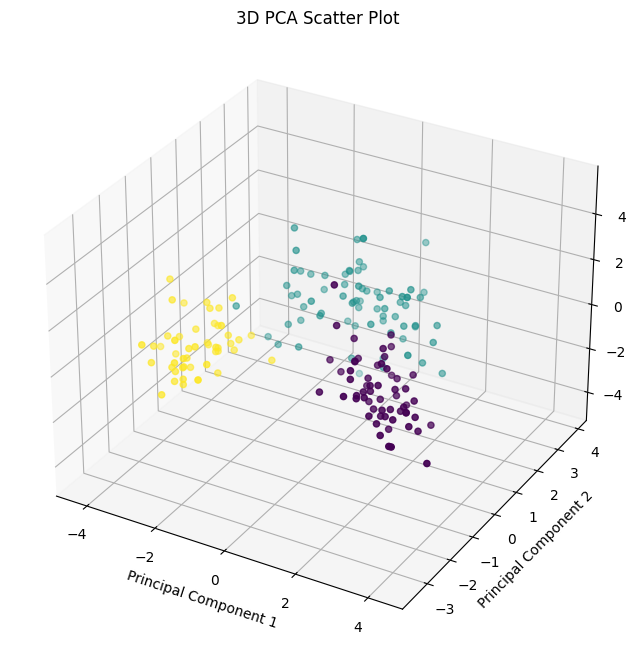

In [22]:
from mpl_toolkits.mplot3d import Axes3D
# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_pca[:,0],df_pca[:,1],df_pca[:,2],c=df_target,marker='o')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D PCA Scatter Plot')
plt.show()

In [29]:
import warnings
warnings.filterwarnings('ignore')

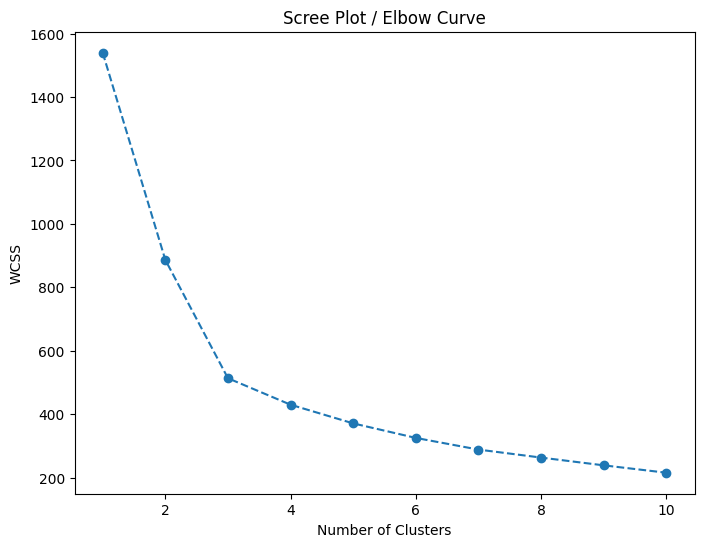

In [30]:
# K-means clustering and Scree Plot
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_pca)
    wcss.append(kmeans.inertia_)
# Plot the Scree Plot / Elbow Curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Scree Plot / Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()



In [45]:
# Perform K-means clustering with the chosen number of clusters
optimal_k = 3  # Replace with the number of clusters i've chosen
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df["kmeans_clusters"] = kmeans.fit_predict(df_pca)
print(df['kmeans_clusters'].value_counts())

2    65
1    62
0    51
Name: kmeans_clusters, dtype: int64


In [37]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster


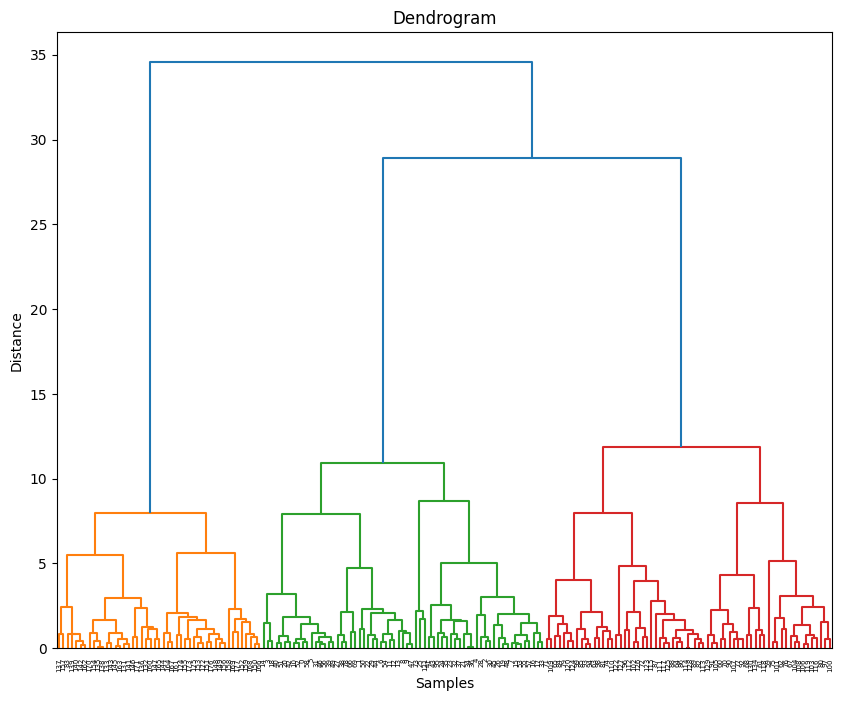

In [47]:
# Hierarchical clustering and Dendrogram
linkage_matrix = linkage(df_pca, method='ward')
plt.figure(figsize=(10, 8))
dendrogram(linkage_matrix)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()
max_d = 10 # Replace with the maximum distance i've chosen based on the dendrogram
hierarchical_clusters = fcluster(linkage_matrix, max_d, criterion='distance')

In [46]:
# Hierarchical Clustering
agg_cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
df['Agg_Cluster'] = agg_cluster.fit_predict(df_pca)

# Number of samples in each cluster
print(df['Agg_Cluster'].value_counts())


0    66
2    65
1    47
Name: Agg_Cluster, dtype: int64


In [50]:
df['Type'].value_counts()


2    71
1    59
3    48
Name: Type, dtype: int64

In [51]:
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,kmeans_clusters,Agg_Cluster
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1,2
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1,2
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1,2
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1,2
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,0,1
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,0,1
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,0,1
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,0,1


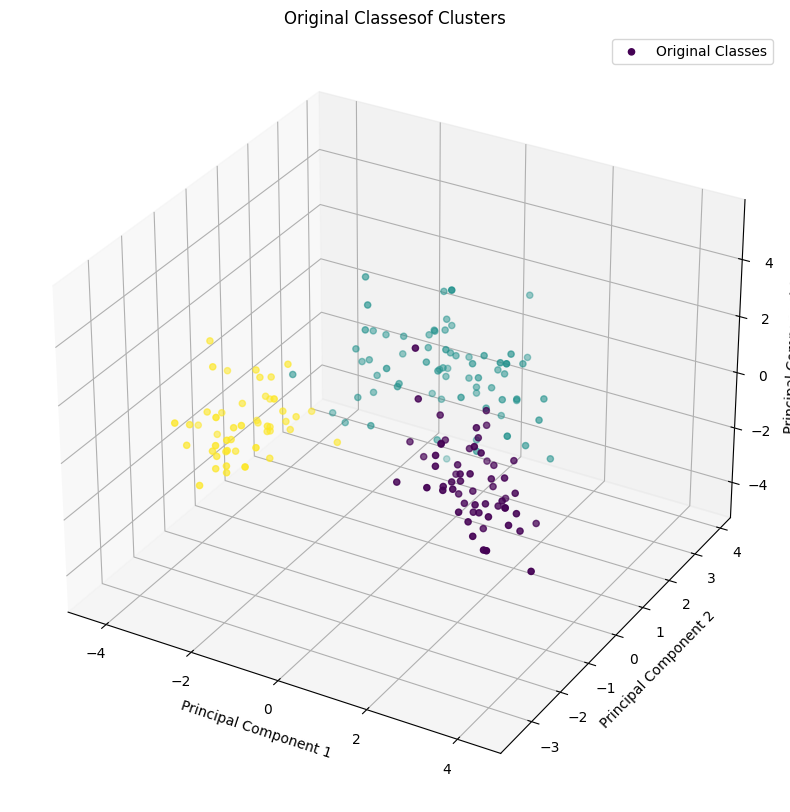

In [64]:
fig = plt.figure(figsize=(16, 10))
ax = fig.add_subplot(111, projection='3d')
# Scatter plot for original classes
ax.scatter(df_pca[:,0],df_pca[:,1],df_pca[:,2],c=df["Type"],marker='o',label='Original Classes')

# Set labels and title
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('Original Classesof Clusters')
ax.legend()
plt.show()

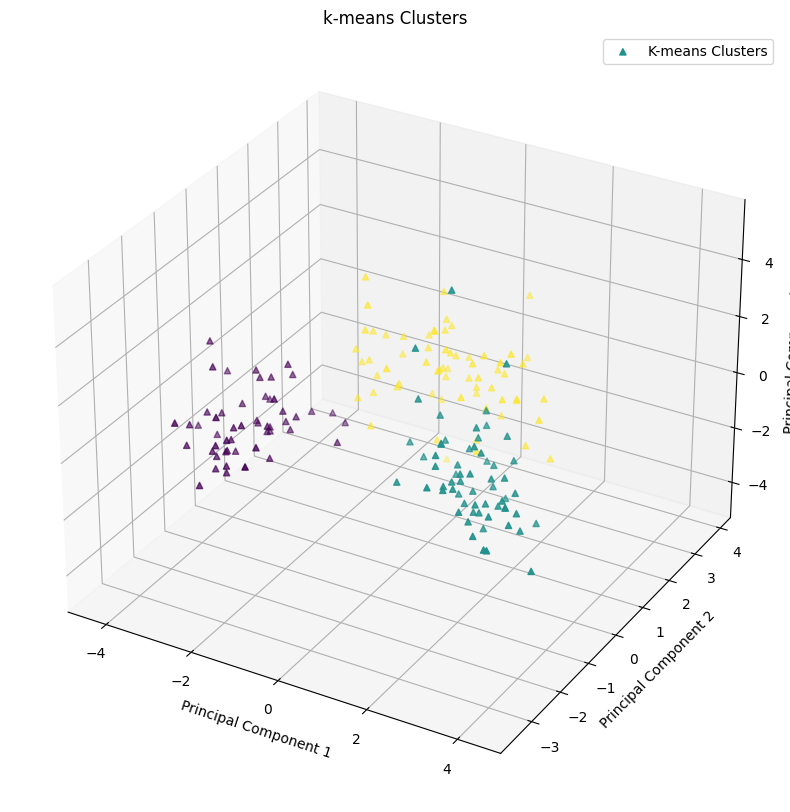

In [62]:
fig = plt.figure(figsize=(16, 10))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for k-means clusters
ax.scatter(df_pca[:, 0], df_pca[:, 1], df_pca[:, 2], c=df["kmeans_clusters"], marker='^', label='K-means Clusters')
# Set labels and title
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('k-means Clusters')
ax.legend()
plt.show()

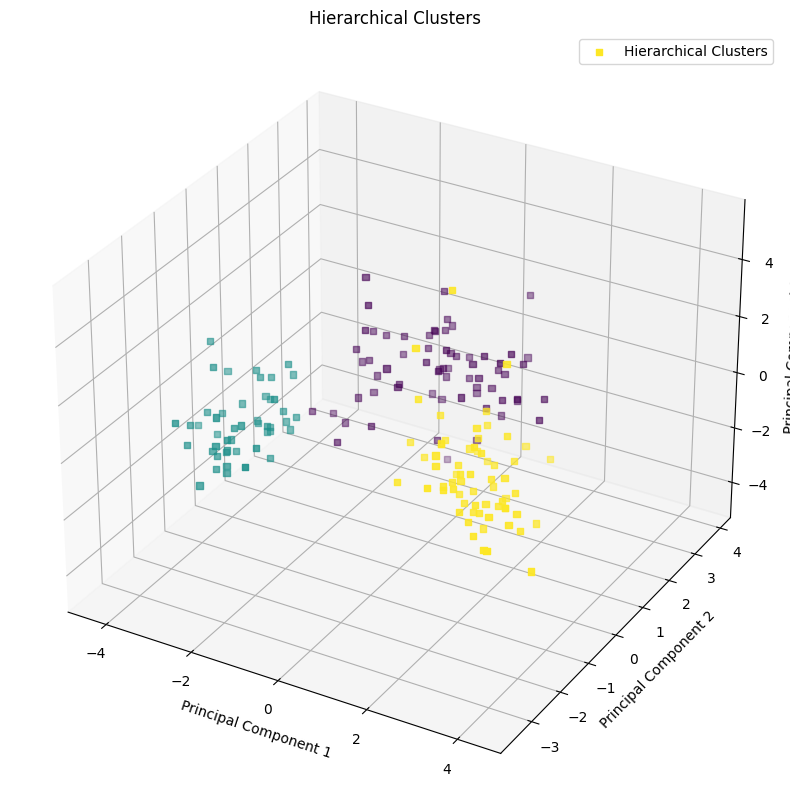

In [63]:
fig = plt.figure(figsize=(16, 10))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for hierarchical clusters
ax.scatter(df_pca[:, 0], df_pca[:, 1], df_pca[:, 2], c=df['Agg_Cluster'], marker='s', label='Hierarchical Clusters')

# Set labels and title
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('Hierarchical Clusters')
ax.legend()
plt.show()

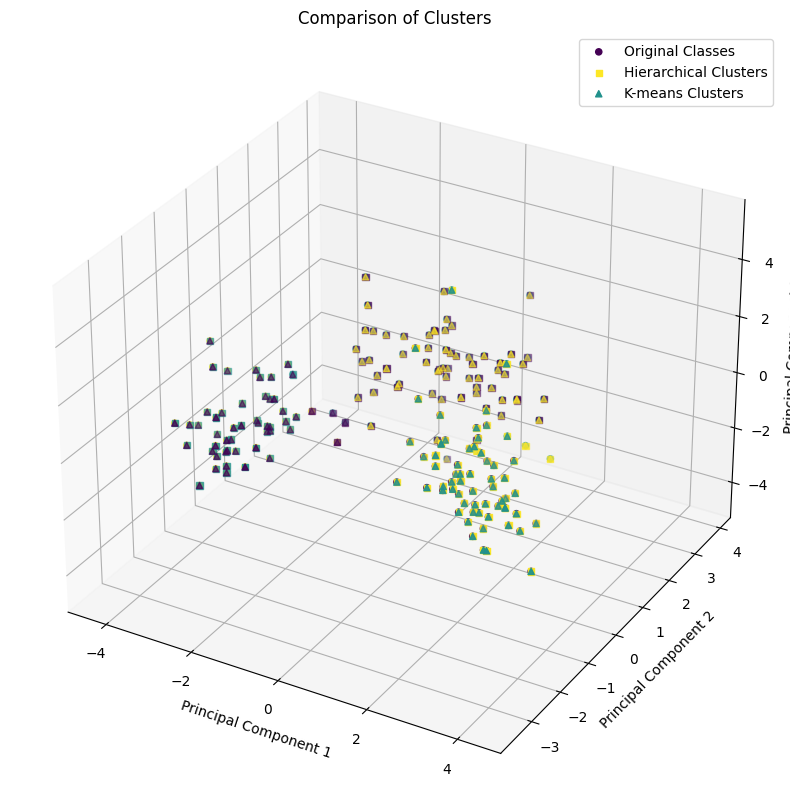

In [61]:
fig = plt.figure(figsize=(16, 10))
ax = fig.add_subplot(111, projection='3d')
# Scatter plot for original classes
ax.scatter(df_pca[:,0],df_pca[:,1],df_pca[:,2],c=df["Type"],marker='o',label='Original Classes')
# Scatter plot for hierarchical clusters
ax.scatter(df_pca[:, 0], df_pca[:, 1], df_pca[:, 2], c=df['Agg_Cluster'], marker='s', label='Hierarchical Clusters')
# Scatter plot for k-means clusters
ax.scatter(df_pca[:, 0], df_pca[:, 1], df_pca[:, 2], c=df["kmeans_clusters"], marker='^', label='K-means Clusters')
# Set labels and title
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('Comparison of Clusters')
ax.legend()
plt.show()